In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr

In [2]:
data=pd.read_csv('movie_dataset.csv')

# EXPLORATORY DATA ANALYSIS

In [3]:
data.head(2)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski


In [4]:
data.tail(2)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
4801,4801,0,NaN,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,...,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,Daniel Henney Eliza Coupe Bill Paxton Alan Ruc...,"[{'name': 'Daniel Hsia', 'gender': 2, 'departm...",Daniel Hsia
4802,4802,0,Documentary,NaN,25975,obsession camcorder crush dream girl,en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,...,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16,Drew Barrymore Brian Herzlinger Corey Feldman ...,"[{'name': 'Clark Peterson', 'gender': 2, 'depa...",Brian Herzlinger


In [5]:
data.shape

(4803, 24)

In [6]:
#removing unwanted columns


new_data=data.drop(data[['budget','homepage','id','production_companies','production_countries','spoken_languages','status','tagline','title']],axis=1)

In [7]:
new_data.head(2)

,index,genres,keywords,original_language,original_title,overview,popularity,release_date,revenue,runtime,vote_average,vote_count,cast,crew,director
0,0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski


In [8]:
new_data.shape

(4803, 15)

In [9]:
new_data.columns.tolist()

['index',
 'genres',
 'keywords',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'release_date',
 'revenue',
 'runtime',
 'vote_average',
 'vote_count',
 'cast',
 'crew',
 'director']

In [10]:
#checking null values

new_data.isnull().sum()

index                  0
genres                28
keywords             412
original_language      0
original_title         0
overview               3
popularity             0
release_date           1
revenue                0
runtime                2
vote_average           0
vote_count             0
cast                  43
crew                   0
director              30
dtype: int64

In [11]:
new_data.shape

(4803, 15)

In [12]:
#missing values are dropped

new_data=new_data.dropna()

In [13]:
new_data.shape

(4375, 15)

In [14]:
new_data.corr()

,index,popularity,revenue,runtime,vote_average,vote_count
index,1.000000,-0.394573,-0.518325,-0.290320,-0.036187,-0.430994
popularity,-0.394573,1.000000,0.635650,0.213875,0.281076,0.771656
revenue,-0.518325,0.635650,1.000000,0.249207,0.198119,0.776718
runtime,-0.290320,0.213875,0.249207,1.000000,0.354820,0.270843
vote_average,-0.036187,0.281076,0.198119,0.354820,1.000000,0.338863
vote_count,-0.430994,0.771656,0.776718,0.270843,0.338863,1.000000


<AxesSubplot:xlabel='runtime', ylabel='count'>

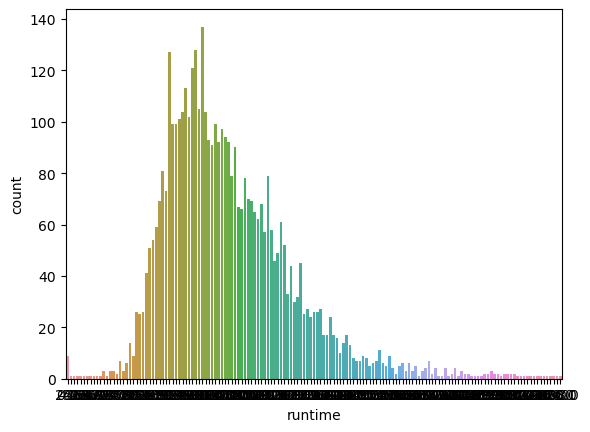

In [15]:

sns.countplot(data=new_data,x='runtime')

In [16]:
new_data.head(2)

,index,genres,keywords,original_language,original_title,overview,popularity,release_date,revenue,runtime,vote_average,vote_count,cast,crew,director
0,0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski


In [17]:
new_data['release_date'] =pd.to_datetime(new_data['release_date'],format ='%Y-%m-%dT')

In [18]:
new_data.head(2)

,index,genres,keywords,original_language,original_title,overview,popularity,release_date,revenue,runtime,vote_average,vote_count,cast,crew,director
0,0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski


In [19]:
new_data.shape

(4375, 15)

# tfid vectorizer

In [20]:
#tfidf vectorizer
#to  convert word to matrix


from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

new_data['overview'] =new_data['overview'].fillna('')

tfidf_matrix = tfidf.fit_transform(new_data['overview'])

tfidf_matrix.shape

(4375, 19807)

In [21]:
#cosine similaity matrix


from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [22]:
indices = pd.Series(new_data.index, index=new_data['original_title']).drop_duplicates()

In [23]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return new_data['original_title'].iloc[movie_indices]

In [24]:
get_recommendations('Avatar')

3604                       Apollo 18
2130                    The American
634                       The Matrix
1341                Obitaemyy Ostrov
529                 Tears of the Sun
1610                           Hanna
311     The Adventures of Pluto Nash
847                         Semi-Pro
775                        Supernova
2628             Blood and Chocolate
Name: original_title, dtype: object

# bag of words

In [25]:
#bag of words


from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
bow_matrix = vectorizer.fit_transform(new_data['overview'])

In [26]:
#cosine similarity matrix

from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(bow_matrix)

In [27]:
def get_recommendation(movie_title, num_recommendations=10):
    index =new_data[new_data['original_title'] == movie_title].index[0]
    similarity_scores = list(enumerate(cosine_sim[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similar_movies = [new_data.iloc[score[0]]['original_title'] for score in similarity_scores[1:num_recommendations+1]]
    return similar_movies

def final_recommendations(x):   
    return get_recommendations(x)

In [28]:
get_recommendation('Avatar', num_recommendations=10)

['Apollo 18',
 'Tears of the Sun',
 'Beowulf',
 'The American',
 'Obitaemyy Ostrov',
 'The Matrix',
 'Aliens vs Predator: Requiem',
 'Hanna',
 'Just Visiting',
 'In Bruges']

In [29]:
demo = gr.Interface(
    fn=final_recommendations,
    inputs=gr.Textbox(label="Enter the Movie Name"),
    outputs=gr.Textbox(label="Recommended Movies"),
)
demo.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
